In [1]:
import jpype
import scyjava

scyjava.config.endpoints.append('ome:formats-gpl')
scyjava.start_jvm()
loci = jpype.JPackage("loci")
loci.common.DebugTools.setRootLevel("ERROR")

SLF4J: No SLF4J providers were found.
SLF4J: Defaulting to no-operation (NOP) logger implementation
SLF4J: See https://www.slf4j.org/codes.html#noProviders for further details.


In [278]:
scyjava.shutdown_jvm()

In [91]:
import numpy as np
from rich import print
import matplotlib.pyplot as plt

In [132]:
reader = loci.formats.ImageReader()

In [133]:
# Create metadata
factory = loci.common.services.ServiceFactory()
ome_service = factory.getInstance(loci.formats.services.OMEXMLService)
meta = ome_service.createOMEXMLMetadata()
reader.setMetadataStore(meta)

reader.setFlattenedResolutions(False)

In [134]:
reader.setOriginalMetadataPopulated(True)

In [181]:
reader.setId('data/Artery-with-holes.svs')
# reader.setId('data/MUW_6P_2019-22301_HE/MUW_6P_2019-22301_HE.vsi')
# reader.setId('data/OS-1/OS-1.vsi')

In [182]:
n_series = reader.getSeriesCount()
print(n_series)

2

In [183]:
for series in range(n_series):
    reader.setSeries(series)
    n_res = reader.getResolutionCount()
    print(f"For series {series}, has resolution {n_res}")

    mpp = meta.getPixelsPhysicalSizeX(series)
    if (n_res > 1) | (mpp is not None):
        mag = meta.getObjectiveNominalMagnification(0, series)
    else:
        mag = None
    print("mpp", mpp)
    print("mag", mag)

    for res in range(n_res):
        reader.setResolution(res)
        x = reader.getSizeX()
        y = reader.getSizeY()
        n_rgb = reader.getRGBChannelCount()
        print(res, x, y, n_rgb)

For series 0, has resolution 3

mpp ome.units.quantity.Length: value[0.4942], unit[µm] stored as java.lang.Double

mag 20.0

0 19919 19958 3

1 4979 4989 3

2 2489 2494 3

For series 1, has resolution 1

mpp None

mag None

0 1600 629 3

In [101]:
# reader = loci.formats.Memoizer(reader, 1)

In [80]:
# reader.close()

In [13]:
# Memorize?

In [125]:
reader.getPixelType()

1

In [226]:
FT = loci.formats.FormatTools
fmt2type = {
    FT.INT8: "i1",
    FT.UINT8: "u1",
    FT.INT16: "i2",
    FT.UINT16: "u2",
    FT.INT32: "i4",
    FT.UINT32: "u4",
    FT.FLOAT: "f4",
    FT.DOUBLE: "f8",
}

In [227]:
fmt2type[reader.getPixelType()]

'u1'

In [223]:
reader.getCurrentFile()

'data/MUW_6P_2019-22301_HE/MUW_6P_2019-22301_HE.vsi'

In [259]:
n_level = reader.getSeriesCount()

In [126]:
meta.getImageCount()

16

In [127]:
i = meta.getPixelsSizeX(0)
print(i)

6753

In [98]:
reader.setSeries(0)

In [110]:
i = meta.getPixelsPhysicalSizeX(6)
print(i)

ome.units.quantity.Length: value[2.7506736095880218], unit[µm] stored as java.lang.Double

In [104]:
i.value()

2.750520368718406

In [198]:
reader.isInterleaved()

True

In [176]:
reader.setSeries(0)
reader.setResolution(2)
idx_pointer = reader.getIndex(0, 0, 0)

In [184]:
y = reader.getSizeY()
x = reader.getSizeX()
print(x, y)

1600 629

In [178]:
reader.setFillColor(scyjava.to_java(0, type="b"))

In [185]:
buffer = reader.openBytes(idx_pointer, 0, 0, 1600, 629)

In [186]:
im = np.frombuffer(bytes(buffer), dtype=np.uint8)
im.shape = (100, 100, 3)
# im = np.transpose(im, (1, 2, 0))

ValueError: cannot reshape array of size 3019200 into shape (100,100,3)

TypeError: Invalid shape (3019200,) for image data

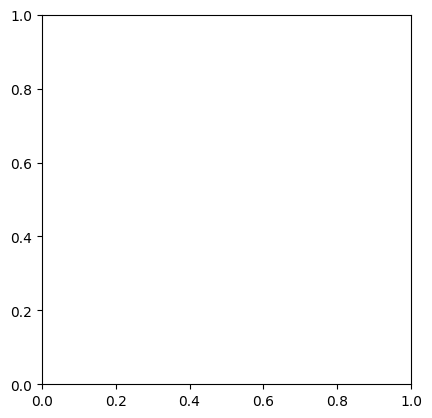

In [187]:
plt.imshow(im)

In [130]:
meta.getObjectiveNominalMagnification(0, 2)

java.lang.IndexOutOfBoundsException: java.lang.IndexOutOfBoundsException: Index 2 out of bounds for length 2

In [124]:
i = meta.getObjectiveCalibratedMagnification(0, 0)

In [125]:
print(i)

None

In [28]:
buffer = reader.openThumbBytes(0)

In [29]:
im = np.frombuffer(bytes(buffer), dtype=np.uint8)

In [32]:
reader.getThumbSizeX()

113

In [33]:
reader.getThumbSizeY()

128

In [126]:
# 40x, 0.17

In [127]:
unit.getSymbol()

'µm'

In [234]:
meta.getInstrumentCount()

1

In [236]:
meta.getObjectiveCount(0)

3

In [ ]:
for 

In [237]:
meta.getObjectiveLotNumber(0, 0)

In [245]:
meta.getPlaneCount(2)

1

In [120]:
print(meta.getObjectiveNominalMagnification(0, 2))

40.0

In [116]:
meta.getResolutionCount(2)

1

In [111]:
meta.getObjectiveNominalMagnification?

Signature: meta.getObjectiveNominalMagnification(*args) -> java.lang.java.lang.Double
Docstring:
Java method dispatch 'getObjectiveNominalMagnification' for 'ome.xml.meta.OMEXMLMetadataImpl'

Virtual Methods:
  * java.lang.Double getObjectiveNominalMagnification(int, int)

Returns:
  java.lang.Double
File:      ~/miniforge3/envs/lazyslide/lib/python3.11/site-packages/jpype/_jmethod.py
Type:      _JMethod

In [275]:
reader.getResolutionCount()

1

In [273]:
for res in range(reader.getResolutionCount()):
    reader.setResolution(res)
    print("Resolution", res)
    n_level = reader.getSeriesCount()
    print("N Level", n_level)
    for level in range(n_level):
        reader.setSeries(level)
        t = reader.getSizeT()
        c = reader.getEffectiveSizeC()
        z = reader.getSizeZ(),
        y = reader.getSizeY(),
        x = reader.getSizeX(),
        n_rgb = reader.getRGBChannelCount(),
        mpp = meta.getPixelsPhysicalSizeX(level)
        print("Level: ", level)
        print("T C Z Y X N_RGB: ", t, c, z[0], y[0], x[0], n_rgb[0])
        print(mpp)
        

Resolution 0

N Level 4

Level:  0

T C Z Y X N_RGB:  1 1 1 8989 7956 3

ome.units.quantity.Length: value[2.750520368718406], unit[µm] stored as java.lang.Double

Level:  1

T C Z Y X N_RGB:  1 1 1 8974 17949 3

ome.units.quantity.Length: value[2.7506736095880218], unit[µm] stored as java.lang.Double

Level:  2

T C Z Y X N_RGB:  1 1 1 30614 155755 3

ome.units.quantity.Length: value[0.13776618985031722], unit[µm] stored as java.lang.Double

Level:  3

T C Z Y X N_RGB:  1 1 1 375 991 3

None

java.lang.IllegalArgumentException: java.lang.IllegalArgumentException: Invalid resolution: 1

In [263]:
for level in range(n_level):
    reader.setResolution(level)
    t = reader.getSizeT()
    c = reader.getEffectiveSizeC()
    z = reader.getSizeZ(),
    y = reader.getSizeY(),
    x = reader.getSizeX(),
    n_rgb = reader.getRGBChannelCount(),
    mpp = meta.getPixelsPhysicalSizeX(level)
    # mag = meta.getObjectiveCalibratedMagnification(0, level)
    
    print("Level: ", level)
    print("T C Z Y X N_RGB: ", t, c, z[0], y[0], x[0], n_rgb[0])
    print(mpp)
    # print(mag)

    # print(dict(reader.getSeriesMetadata()))
    # print(reader.getMetadataOpeions())
    

Level:  0

T C Z Y X N_RGB:  1 1 1 375 991 3

ome.units.quantity.Length: value[2.750520368718406], unit[µm] stored as java.lang.Double

java.lang.IllegalArgumentException: java.lang.IllegalArgumentException: Invalid resolution: 1

In [31]:
reader.isRGB()

True

In [32]:
reader.isInterleaved()

False

In [33]:
reader.getDimensionOrder()

'XYCZT'

In [34]:
reader.getResolutionCount()

1

In [35]:
reader.getPixelType()

1

{}